In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data link "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Analysis

<AxesSubplot:>

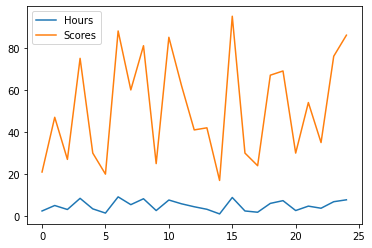

In [6]:
df.plot()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

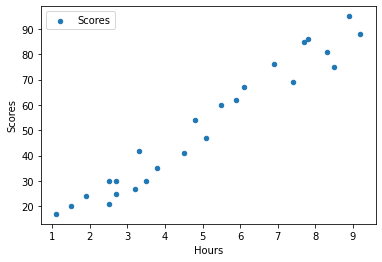

In [7]:
df.plot(kind='scatter', x='Hours', y='Scores', label='Scores')

## Splitting

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_X = train_set.drop('Scores', axis=1)
train_y = train_set['Scores'].copy()
test_X = test_set.drop('Scores', axis=1)
test_y = test_set['Scores'].copy()

In [9]:
print(len(train_X), len(train_y), len(test_X), len(test_y))

20 20 5 5


## Modelling

In [10]:
from sklearn.ensemble import RandomForestRegressor
predict = RandomForestRegressor().fit(train_X, train_y)

# prediction

In [11]:
predicted_y = predict.predict(test_X)
df1 = pd.DataFrame({'Actual':test_y, 'Prediction':predicted_y})
df1

,Actual,Prediction
8,81,79.52
16,30,27.16
0,21,27.16
23,76,73.70
11,62,62.33


# Evaluation

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predicted_y)
rmse = np.sqrt(mse)
print(f'rmse:{rmse}, mse:{mse}')

rmse:3.2741563798939106, mse:10.720099999999999


# Task prediction 

In [13]:
new_pred = predict.predict([[9.25]])
print(f'no. of hours={9.25}, percentage={new_pred}')

no. of hours=9.25, percentage=[88.37]


# end of code